# ANALYSE DES VENTES DE CONSOLES

### Importation, nettoyage et traitement préliminaires

In [1]:
#On importe les librairies que nous utiliserons pour traiter les données et les visualiser
import pandas as pd, numpy as np

In [2]:
#On importe les données dans un dataframe
df_consoles = pd.read_excel("Vente+de+console_2022.xlsx")

In [20]:
df_consoles.head(25)

,Console,Constructeur,Date de Sortie,Vente (en million)
0,PlayStation 2,Sony,2000,158.0000
1,Nintendo DS,Nintendo,2004,157.1004
2,Switch,Nintendo,2017,126.8762
3,Game Boy (avec Color),Nintendo,1989,118.6900
4,PlayStation 4,Sony,2013,115.8300
5,PlayStation,Sony,1994,103.4240
6,Wii,Nintendo,2006,99.5974
7,PlayStation 3,Sony,2006,87.9040
8,Xbox 360,Microsoft,2005,83.2000
9,PSP,Sony,2004,81.9750


In [7]:
df_consoles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Console             20 non-null     object 
 1   Constructeur        20 non-null     object 
 2   Date de Sortie      20 non-null     int64  
 3   Vente (en million)  20 non-null     float64
dtypes: float64(1), int64(1), object(2)
memory usage: 772.0+ bytes


In [8]:
df_consoles.describe()

,Date de Sortie,Vente (en million)
count,20.000000,20.000000
mean,2000.900000,80.748635
std,11.465738,40.745223
min,1977.000000,24.000000
25%,1993.000000,46.194000
50%,2002.500000,80.112300
75%,2007.250000,106.525500
max,2020.000000,158.000000


In [10]:
print(df_consoles['Console'].unique())
print('_'*25)
print(df_consoles['Constructeur'].unique())
print('_'*25)
print(df_consoles['Date de Sortie'].unique())
print('_'*25)
print(df_consoles['Vente (en million)'].unique())

['PlayStation 2' 'Nintendo DS' 'Switch' 'Game Boy (avec Color)'
 'PlayStation 4' 'PlayStation' 'Wii' 'PlayStation 3' 'Xbox 360' 'PSP'
 'Game Boy Advance' 'Nintendo 3DS' 'NES' 'Xbox One' 'Super Nintendo'
 'PlayStation 5' 'Nintendo 64' 'Mega Drive' 'Atari 2600' 'Xbox']
_________________________
['Sony' 'Nintendo' 'Microsoft' 'Sega' 'Atari']
_________________________
[2000 2004 2017 1989 2013 1994 2006 2005 2001 2011 1983 1990 2020 1996
 1988 1977]
_________________________
[158.     157.1004 126.8762 118.69   115.83   103.424   99.5974  87.904
  83.2     81.975   78.2496  75.94    60.6718  59.74    47.136   43.368
  31.6128  31.0575  30.6     24.    ]


### Analyse des ventes par construteur

In [13]:
constructeur_sales = df_consoles.groupby('Constructeur')['Vente (en million)'].sum()
constructeur_sales = constructeur_sales.sort_values(ascending=False).reset_index()

# Renommer les colonnes pour plus de clarté (facultatif)
constructeur_sales.columns = ['Constructeur', 'Total Ventes (en million)']

# Afficher le DataFrame final
constructeur_sales

,Constructeur,Total Ventes (en million)
0,Nintendo,795.8742
1,Sony,590.5010
2,Microsoft,166.9400
3,Sega,31.0575
4,Atari,30.6000


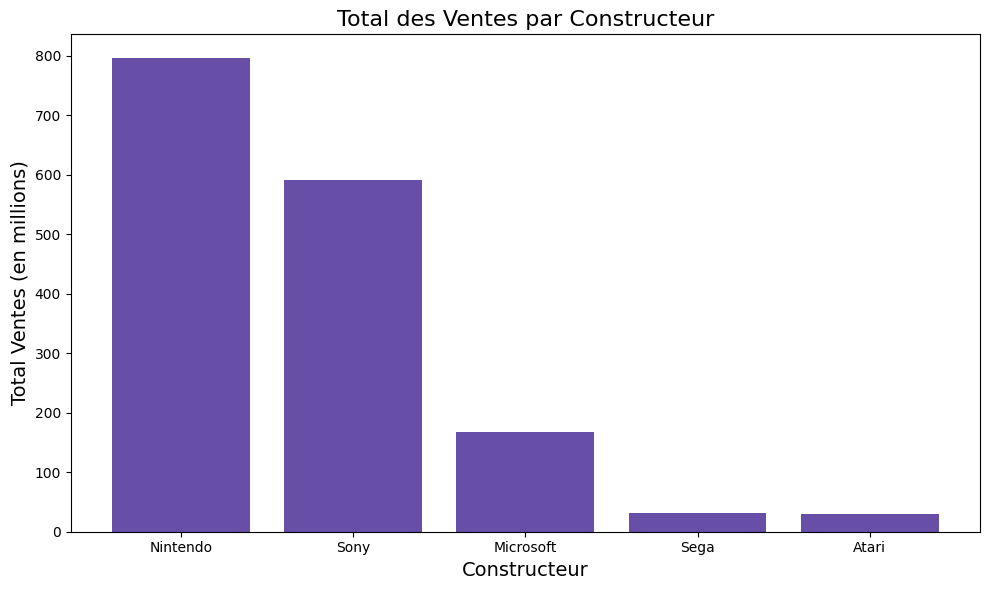

In [17]:
import matplotlib.pyplot as plt

# Tracer l'histogramme
plt.figure(figsize=(10, 6))  # Définir la taille de la figure
plt.bar(constructeur_sales['Constructeur'], constructeur_sales['Total Ventes (en million)'], color='#674ea7')

# Ajouter des titres et labels
plt.title('Total des Ventes par Constructeur', fontsize=16)
plt.xlabel('Constructeur', fontsize=14)
plt.ylabel('Total Ventes (en millions)', fontsize=14)

# Afficher l'histogramme
plt.tight_layout()  # Ajuste l'espace pour éviter le chevauchement
plt.show()

### Analyse des ventes par console

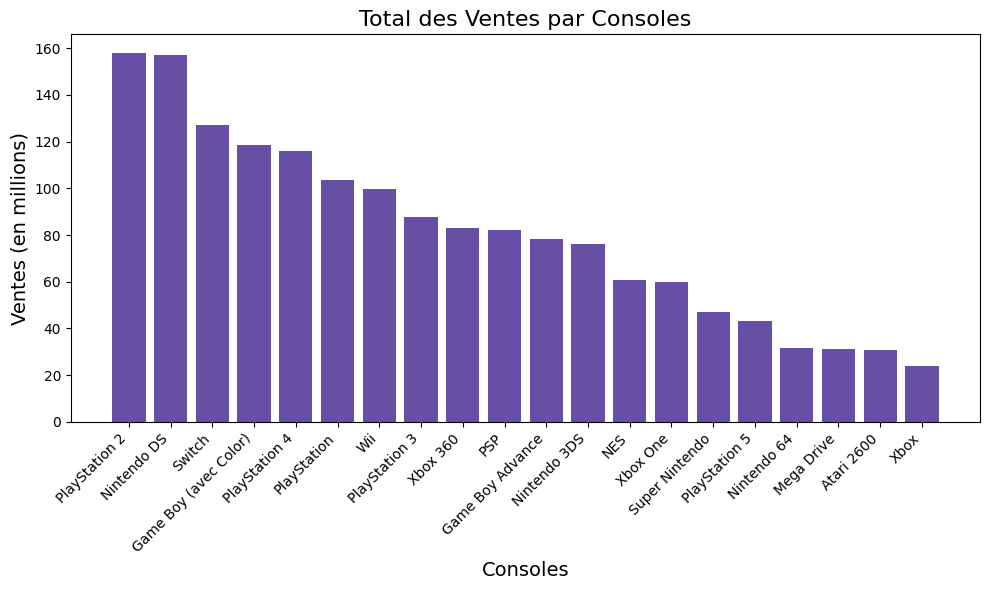

In [19]:
# Tracer l'histogramme
plt.figure(figsize=(10, 6))  # Définir la taille de la figure
plt.bar(df_consoles['Console'], df_consoles['Vente (en million)'], color='#674ea7')

# Ajouter des titres et labels
plt.title('Total des Ventes par Consoles', fontsize=16)
plt.xlabel('Consoles', fontsize=14)
plt.ylabel('Ventes (en millions)', fontsize=14)

# Faire tourner les noms des constructeurs pour une meilleure lisibilité
plt.xticks(rotation=45, ha='right')

# Afficher l'histogramme
plt.tight_layout()  # Ajuste l'espace pour éviter le chevauchement
plt.show()

### Analyse de ventes par console et constructeur en ventes actuellement

In [22]:
# Filtrer les lignes où 'Date de Sortie' est >= 2013
df_consoles_actuelle = df_consoles[df_consoles['Date de Sortie'] >= 2013]
df_consoles_actuelle.reset_index(drop=True, inplace=True)

df_consoles_actuelle.head()

,Console,Constructeur,Date de Sortie,Vente (en million)
0,Switch,Nintendo,2017,126.8762
1,PlayStation 4,Sony,2013,115.8300
2,Xbox One,Microsoft,2013,59.7400
3,PlayStation 5,Sony,2020,43.3680


In [23]:
constructeur_actuelle_sales = df_consoles_actuelle.groupby('Constructeur')['Vente (en million)'].sum()
constructeur_actuelle_sales = constructeur_actuelle_sales.sort_values(ascending=False).reset_index()

# Renommer les colonnes pour plus de clarté (facultatif)
constructeur_actuelle_sales.columns = ['Constructeur', 'Total Ventes (en million)']

# Afficher le DataFrame final
constructeur_actuelle_sales

,Constructeur,Total Ventes (en million)
0,Sony,159.1980
1,Nintendo,126.8762
2,Microsoft,59.7400


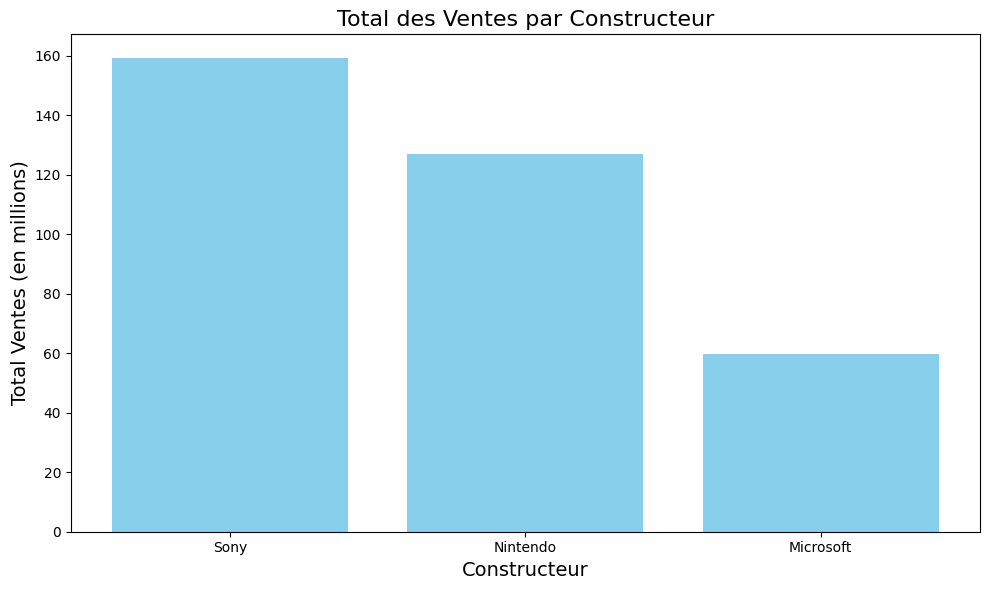

In [27]:
# Tracer l'histogramme
plt.figure(figsize=(10, 6))  # Définir la taille de la figure
plt.bar(constructeur_actuelle_sales['Constructeur'], constructeur_actuelle_sales['Total Ventes (en million)'], color='skyblue')

# Ajouter des titres et labels
plt.title('Total des Ventes par Constructeur', fontsize=16)
plt.xlabel('Constructeur', fontsize=14)
plt.ylabel('Total Ventes (en millions)', fontsize=14)

# Afficher l'histogramme
plt.tight_layout()  # Ajuste l'espace pour éviter le chevauchement
plt.show()

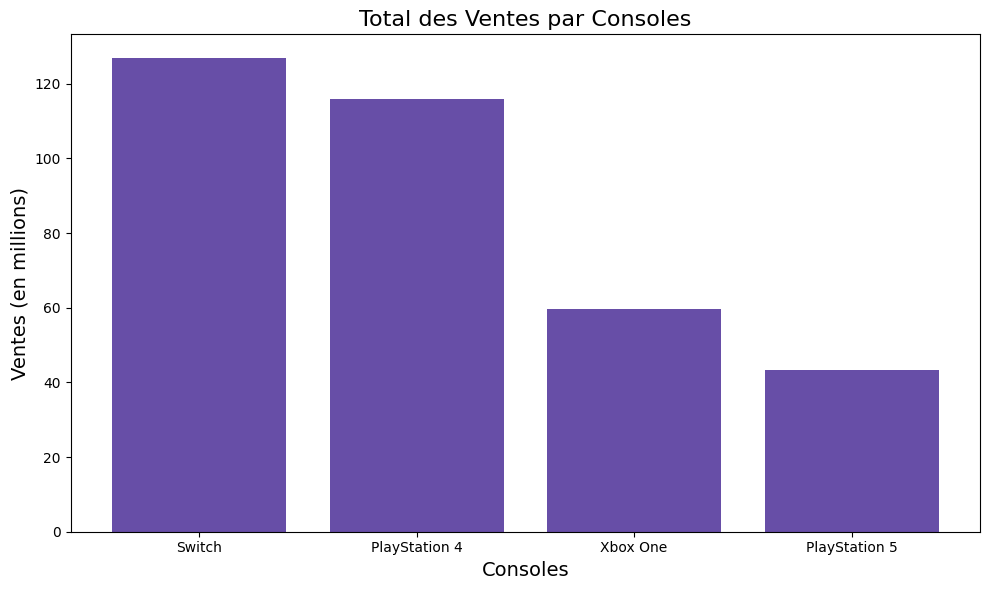

In [26]:
# Tracer l'histogramme
plt.figure(figsize=(10, 6))  # Définir la taille de la figure
plt.bar(df_consoles_actuelle['Console'], df_consoles_actuelle['Vente (en million)'], color='#674ea7')

# Ajouter des titres et labels
plt.title('Total des Ventes par Consoles', fontsize=16)
plt.xlabel('Consoles', fontsize=14)
plt.ylabel('Ventes (en millions)', fontsize=14)

# Afficher l'histogramme
plt.tight_layout()  # Ajuste l'espace pour éviter le chevauchement
plt.show()